In [40]:
import sys
!{sys.executable} -m pip install --upgrade pip

# List of required packages
required_packages = [
    'pandas', 
    'numpy', 
    'scikit-learn', 
    'tensorflow', 
    'matplotlib', 
    'alpha_vantage'
]

# Function to check if each package is installed
def check_packages(packages):
    for package in packages:
        try:
            __import__(package)
            print(f'{package} is installed')
        except ImportError:
            print(f'{package} is not installed')

check_packages(required_packages)


Defaulting to user installation because normal site-packages is not writeable
pandas is installed
numpy is installed
scikit-learn is not installed
tensorflow is installed
matplotlib is installed
alpha_vantage is installed


In [41]:
!pip install pandas numpy scikit-learn tensorflow matplotlib alpha_vantage


Defaulting to user installation because normal site-packages is not writeable


In [42]:
from alpha_vantage.timeseries import TimeSeries

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'YKRVEKRBE0PWGPCV'
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Include the close prices and volume
data = data[['4. close', '5. volume']]

# Reverse the order to have oldest to newest
data = data[::-1]

# Reset the index to make 'date' a column
data = data.reset_index()
data.columns = ['date', 'close', 'volume']

# Display the first few rows of the preprocessed dataset
data.head()

# Display the range of dates in the dataset
print(f"Data covers from {data['date'].min()} to {data['date'].max()}")


Data covers from 1999-11-01 00:00:00 to 2024-08-02 00:00:00


In [43]:
import pandas as pd
import numpy as np

# Create Moving Averages
data['SMA_20'] = data['close'].rolling(window=20).mean()
data['SMA_50'] = data['close'].rolling(window=50).mean()

# Function to calculate RSI
def calculate_rsi(data, window):
    delta = data['close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Create RSI
data['RSI_14'] = calculate_rsi(data, 14)

# Create Target Variable
data['target'] = (data['close'].shift(-1) > data['close']).astype(int)

# Drop NaN Values
data = data.dropna()

# Display the updated data
data.head()


,date,close,volume,SMA_20,SMA_50,RSI_14,target
49,2000-01-11,92.75,3942400.0,99.9435,97.3678,41.466830,0
50,2000-01-12,87.19,8714900.0,99.5595,97.5592,39.397971,1
51,2000-01-13,96.75,9220400.0,99.5470,97.8892,44.896416,1
52,2000-01-14,100.44,3485500.0,99.6535,98.2680,50.860887,1
53,2000-01-18,103.94,4099800.0,99.8505,98.6744,54.227320,1


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = data[['SMA_20', 'SMA_50', 'RSI_14']]
target = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


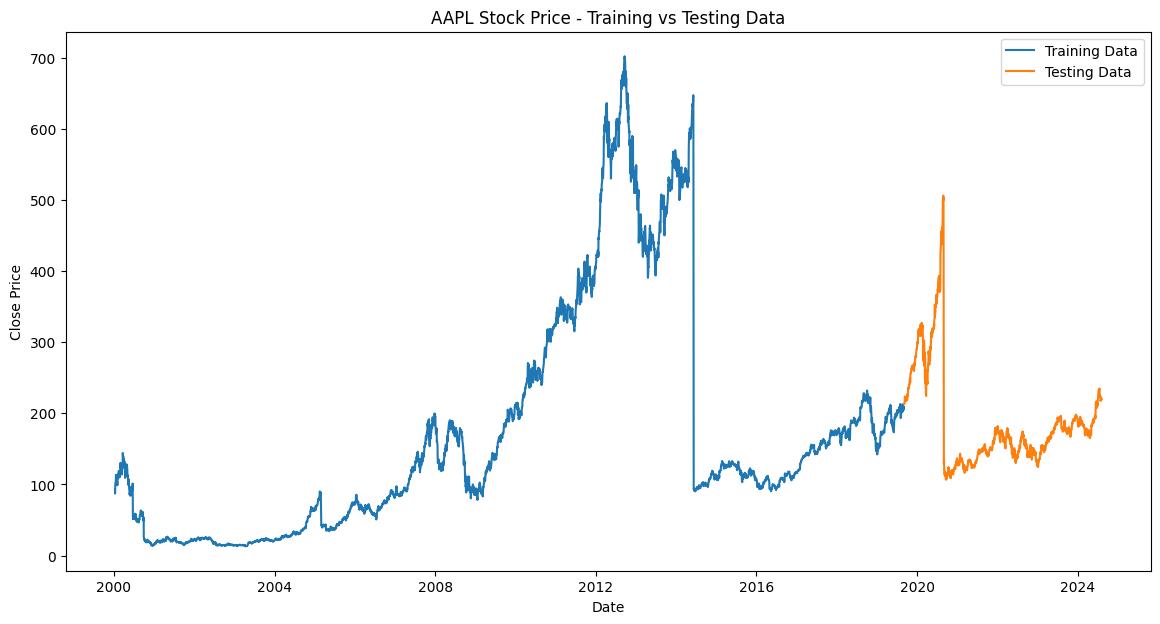

In [45]:
import matplotlib.pyplot as plt

# Split the dates for training and testing
train_dates = data['date'][:len(X_train)]
test_dates = data['date'][len(X_train):]

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(train_dates, data['close'][:len(X_train)], label='Training Data')
plt.plot(test_dates, data['close'][len(X_train):], label='Testing Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Stock Price - Training vs Testing Data')
plt.legend()
plt.show()


In [46]:
# Clear existing data
data = None
train_dates = None
test_dates = None
features = None
target = None
X_train = None
X_test = None
y_train = None
y_test = None


In [47]:
from alpha_vantage.timeseries import TimeSeries

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage premium API key
api_key = 'YKRVEKRBE0PWGPCV'
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize='full')

# Include the adjusted close prices and volume
data = data[['5. adjusted close', '6. volume']]

# Reverse the order to have oldest to newest
data = data[::-1]

# Reset the index to make 'date' a column
data = data.reset_index()
data.columns = ['date', 'adjusted_close', 'volume']

# Display the first few rows of the preprocessed dataset
data.head()

# Display the range of dates in the dataset
print(f"Data covers from {data['date'].min()} to {data['date'].max()}")


Data covers from 1999-11-01 00:00:00 to 2024-08-02 00:00:00


In [48]:
# Create Moving Averages
data['SMA_20'] = data['adjusted_close'].rolling(window=20).mean()
data['SMA_50'] = data['adjusted_close'].rolling(window=50).mean()

# Function to calculate RSI
def calculate_rsi(data, window):
    delta = data['adjusted_close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Create RSI
data['RSI_14'] = calculate_rsi(data, 14)

# Create Target Variable
data['target'] = (data['adjusted_close'].shift(-1) > data['adjusted_close']).astype(int)

# Drop NaN Values
data = data.dropna()

# Display the updated data
data.head()


,date,adjusted_close,volume,SMA_20,SMA_50,RSI_14,target
49,2000-01-11,0.700071,3942400.0,0.754367,0.734925,41.466830,0
50,2000-01-12,0.658104,8714900.0,0.751468,0.736370,39.397971,1
51,2000-01-13,0.730262,9220400.0,0.751374,0.738861,44.896416,1
52,2000-01-14,0.758114,3485500.0,0.752178,0.741720,50.860887,1
53,2000-01-18,0.784532,4099800.0,0.753665,0.744788,54.227320,1


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target variable
features = data[['SMA_20', 'SMA_50', 'RSI_14']]
target = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


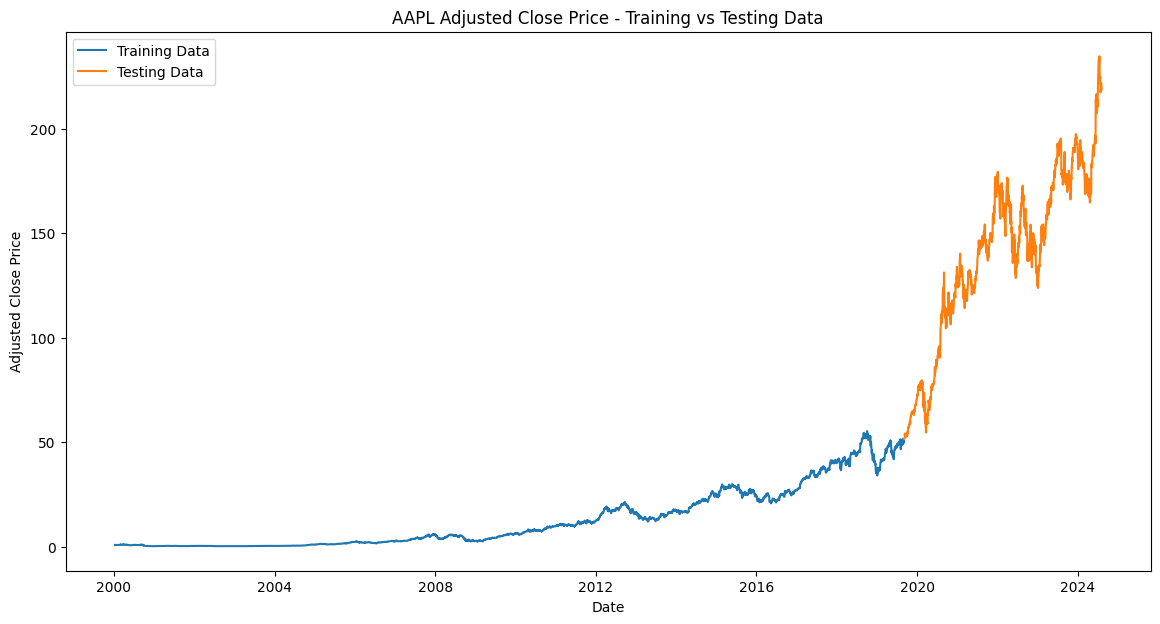

In [50]:
import matplotlib.pyplot as plt

# Split the dates for training and testing
train_dates = data['date'][:len(X_train)]
test_dates = data['date'][len(X_train):]

# Plot the closing prices
plt.figure(figsize=(14, 7))
plt.plot(train_dates, data['adjusted_close'][:len(X_train)], label='Training Data')
plt.plot(test_dates, data['adjusted_close'][len(X_train):], label='Testing Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('AAPL Adjusted Close Price - Training vs Testing Data')
plt.legend()
plt.show()


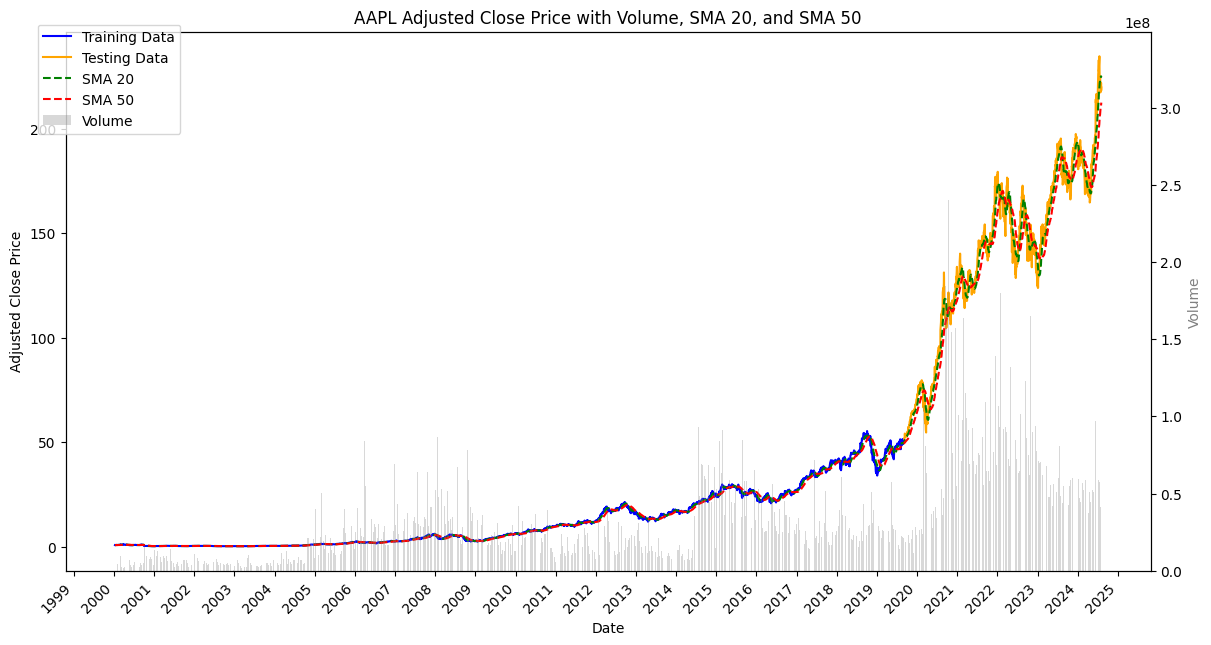

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the closing prices
ax1.plot(train_dates, data['adjusted_close'][:len(X_train)], label='Training Data', color='blue')
ax1.plot(test_dates, data['adjusted_close'][len(X_train):], label='Testing Data', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close Price', color='black')
ax1.tick_params(axis='y')

# Plot the moving averages
ax1.plot(data['date'], data['SMA_20'], label='SMA 20', color='green', linestyle='--')
ax1.plot(data['date'], data['SMA_50'], label='SMA 50', color='red', linestyle='--')

# Create a second y-axis to plot the volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='gray')
ax2.bar(data['date'], data['volume'], alpha=0.3, color='gray', label='Volume')
ax2.tick_params(axis='y')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Set date format on x-axis
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate date labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

plt.title('AAPL Adjusted Close Price with Volume, SMA 20, and SMA 50')
plt.show()


In [52]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Measure training time
start_time = time.time()

# Train the Logistic Regression model
model_lr = LogisticRegression(C=75, max_iter=175, solver='liblinear')
model_lr.fit(X_train, y_train)

end_time = time.time()
training_time_lr = end_time - start_time

# Make predictions
y_pred = model_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred)
recall_lr = recall_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred)
roc_auc_lr = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics and training time
print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(f'Logistic Regression Precision: {precision_lr}')
print(f'Logistic Regression Recall: {recall_lr}')
print(f'Logistic Regression F1-Score: {f1_lr}')
print(f'Logistic Regression ROC-AUC: {roc_auc_lr}')
print(f'Logistic Regression Training Time: {training_time_lr} seconds')

Logistic Regression Accuracy: 0.5331715210355987
Logistic Regression Precision: 0.5331715210355987
Logistic Regression Recall: 1.0
Logistic Regression F1-Score: 0.6955145118733509
Logistic Regression ROC-AUC: 0.5
Logistic Regression Training Time: 0.005006074905395508 seconds


/home/ubuntu/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


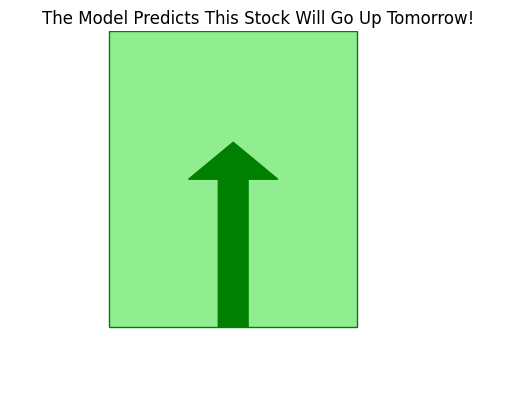

In [108]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Arrow

# End Product for User: Final Prediction for Tomorrow (Logistic Regression)

# Determines most recent date's data (yesterday or last open date for weekends/holidays).
max_date = data['date'].max()
max_date_data = data[data['date'] == max_date]


# Selects relevant attributes, performs scalar transformation, and uses model to generate a prediction. 
relevant_columns = max_date_data.iloc[:, [3, 4, 5]].values # see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
scalar_data = scaler.transform(relevant_columns)
prediction = model_lr.predict(scalar_data)

# Branching logic to generate a visual corresponding with prediction
fig, ax = plt.subplots() # See https://www.geeksforgeeks.org/how-to-draw-shapes-in-matplotlib-with-python/
if prediction[0] == 1:
    rect = Rectangle((0.2, 0.2), width=0.5, height=0.8, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(rect)
    arrow = Arrow(0.45, 0.2, 0, 0.5, width=0.3, color='green')
    ax.add_patch(arrow)
    ax.axis('off')
    plt.title("The Model Predicts This Stock Will Go Up Tomorrow!")
else:
    rect = Rectangle((0.2, 0.2), width=0.5, height=0.8, edgecolor='red', facecolor='salmon')
    ax.add_patch(rect)
    arrow = Arrow(0.45, 0.7, 0, -0.5, width=0.3, color='red')
    ax.add_patch(arrow)
    ax.axis('off')
    plt.title("The Model Predicts This Stock Will Go Down Tomorrow!")
        

In [111]:
!pip install tensorboard


Defaulting to user installation because normal site-packages is not writeable


In [112]:
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.callbacks import TensorBoard

# Set up TensorBoard callback
log_dir = "logs/fit/" + time.strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Measure training time
start_time = time.time()

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=75, validation_data=(X_test_lstm, y_test),
               callbacks=[tensorboard_callback])

end_time = time.time()
training_time_lstm = end_time - start_time

# Make predictions
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype(int)

# Evaluate the model
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
roc_auc_lstm = roc_auc_score(y_test, y_pred_lstm)

# Print the evaluation metrics and training time
print(f'LSTM Accuracy: {accuracy_lstm}')
print(f'LSTM Precision: {precision_lstm}')
print(f'LSTM Recall: {recall_lstm}')
print(f'LSTM F1-Score: {f1_lstm}')
print(f'LSTM ROC-AUC: {roc_auc_lstm}')
print(f'LSTM Training Time: {training_time_lstm} seconds')


Epoch 1/50


/home/ubuntu/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5205 - loss: 0.6926 - val_accuracy: 0.5332 - val_loss: 0.6915
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5254 - loss: 0.6921 - val_accuracy: 0.5332 - val_loss: 0.6911
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5238 - loss: 0.6918 - val_accuracy: 0.5332 - val_loss: 0.6909
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5131 - loss: 0.6927 - val_accuracy: 0.5332 - val_loss: 0.6910
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5063 - loss: 0.6934 - val_accuracy: 0.5332 - val_loss: 0.6910
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5210 - loss: 0.6925 - val_accuracy: 0.5332 - val_loss: 0.6909
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5115 - loss: 0.6932 - val_accuracy: 0.5332 - val_loss: 0.6910
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5226 - loss: 0.6917 - val_accuracy: 0.5332 - val_loss: 0.6910
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0.4868123


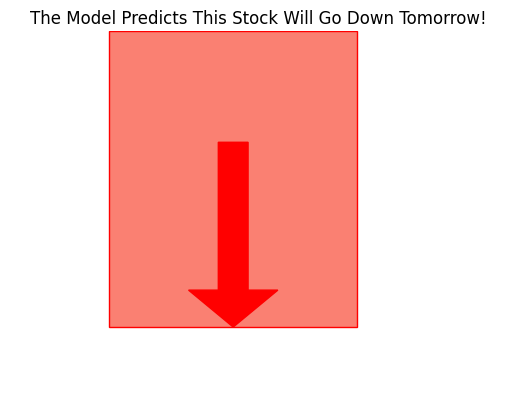

In [114]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Arrow

# End Product for User: Final Prediction for Tomorrow (Logistic Regression)

# Determines most recent date's data (yesterday or last open date for weekends/holidays).
max_date = data['date'].max()
max_date_data = data[data['date'] == max_date]


# Selects relevant attributes, reshapes, and uses model to generate prediction
relevant_columns = max_date_data.iloc[:, [3, 4, 5]].values # see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
reshaped_data = np.reshape(relevant_columns, (relevant_columns.shape[0], 1, relevant_columns.shape[1])) 
lstm_prediction = model_lstm.predict(reshaped_data)

# Branching logic to generate a visual corresponding with prediction
fig, ax = plt.subplots() # See https://www.geeksforgeeks.org/how-to-draw-shapes-in-matplotlib-with-python/
if lstm_prediction[0][0] >= 0.5:
    rect = Rectangle((0.2, 0.2), width=0.5, height=0.8, edgecolor='green', facecolor='lightgreen')
    ax.add_patch(rect)
    arrow = Arrow(0.45, 0.2, 0, 0.5, width=0.3, color='green')
    ax.add_patch(arrow)
    ax.axis('off')
    plt.title("The Model Predicts This Stock Will Go Up Tomorrow!")
else:
    rect = Rectangle((0.2, 0.2), width=0.5, height=0.8, edgecolor='red', facecolor='salmon')
    ax.add_patch(rect)
    arrow = Arrow(0.45, 0.7, 0, -0.5, width=0.3, color='red')
    ax.add_patch(arrow)
    ax.axis('off')
    plt.title("The Model Predicts This Stock Will Go Down Tomorrow!")

In [115]:
# Number of days to visualize
days_to_visualize = 30

# Subset the last 30 days of data
subset_data = data[-days_to_visualize:].copy()
subset_dates = subset_data['date']


In [116]:
# Ensure we have the same features as used in training
subset_features = subset_data[['SMA_20', 'SMA_50', 'RSI_14']]
subset_features = scaler.transform(subset_features)

# Reshape data for LSTM prediction
subset_features_lstm = np.reshape(subset_features, (subset_features.shape[0], 1, subset_features.shape[1]))

# Make predictions using the trained model
subset_data['predicted'] = model_lstm.predict(subset_features_lstm).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [117]:
# Determine if predictions were accurate
subset_data['accurate'] = ((subset_data['predicted'] > subset_data['adjusted_close']) == (subset_data['adjusted_close'].shift(-1) > subset_data['adjusted_close']))


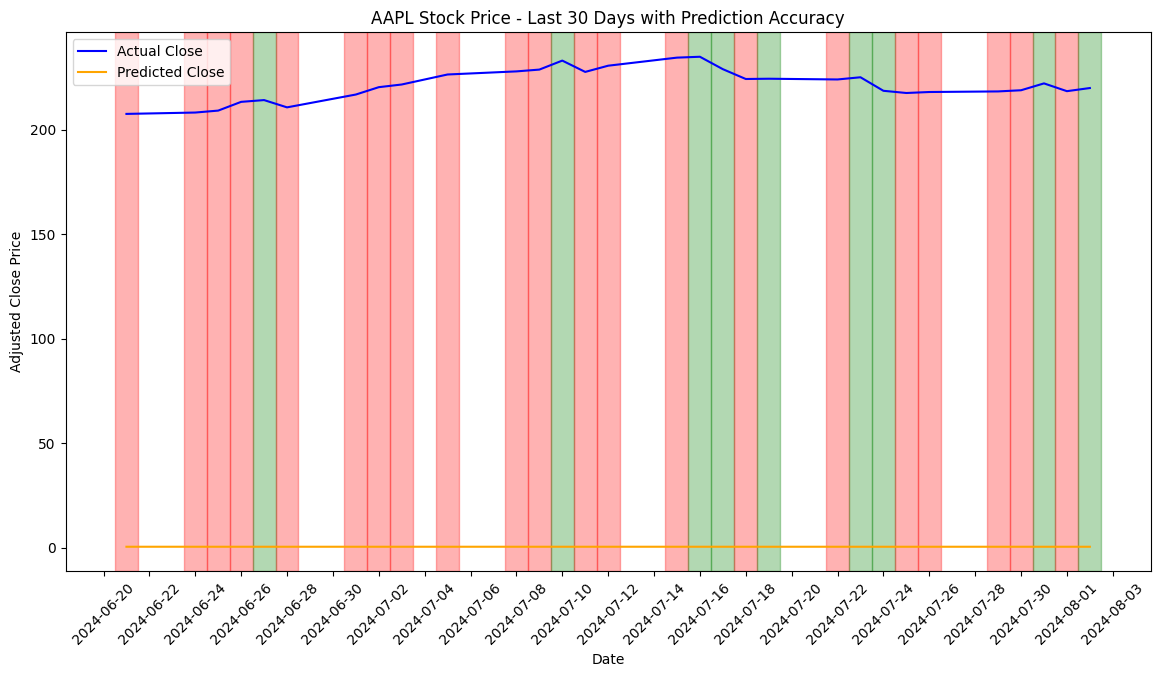

In [118]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 7))

# Plot actual and predicted closing prices
ax.plot(subset_dates, subset_data['adjusted_close'], label='Actual Close', color='blue')
ax.plot(subset_dates, subset_data['predicted'], label='Predicted Close', color='orange')

# Color code the background
for i in range(len(subset_dates)):
    color = 'green' if subset_data['accurate'].iloc[i] else 'red'
    ax.axvspan(subset_dates.iloc[i] - pd.Timedelta(days=0.5), subset_dates.iloc[i] + pd.Timedelta(days=0.5), color=color, alpha=0.3)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
ax.set_title('AAPL Stock Price - Last 30 Days with Prediction Accuracy')
ax.legend()

# Format the date on x-axis
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.show()


In [119]:
from alpha_vantage.timeseries import TimeSeries

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage premium API key
api_key = 'YKRVEKRBE0PWGPCV'
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='AAPL', outputsize='full')

# Include the adjusted close prices, high, and low prices
data = data[['5. adjusted close', '2. high', '3. low', '6. volume']]
data.columns = ['adjusted_close', 'high', 'low', 'volume']

# Reverse the order to have oldest to newest
data = data[::-1]

# Reset the index to make 'date' a column
data = data.reset_index()
data.columns = ['date', 'adjusted_close', 'high', 'low', 'volume']

# Display the first few rows of the preprocessed dataset
data.head()

# Display the range of dates in the dataset
print(f"Data covers from {data['date'].min()} to {data['date'].max()}")


Data covers from 1999-11-01 00:00:00 to 2024-08-02 00:00:00


In [120]:
# Target variable to predict if the next day's adjusted closing price is higher (1) or lower (0) than today's
data['target'] = (data['adjusted_close'].shift(-1) > data['adjusted_close']).astype(int)
data = data.dropna()


In [121]:
# Calculate Simple Moving Averages (SMA)
data['SMA_20'] = data['adjusted_close'].rolling(window=20).mean()
data['SMA_50'] = data['adjusted_close'].rolling(window=50).mean()

# Function to calculate RSI
def calculate_rsi(data, window):
    delta = data['adjusted_close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Create RSI
data['RSI_14'] = calculate_rsi(data, 14)

# Calculate Ichimoku Cloud components
def ichimoku_cloud(data):
    high_9 = data['high'].rolling(window=9).max()
    low_9 = data['low'].rolling(window=9).min()
    high_26 = data['high'].rolling(window=26).max()
    low_26 = data['low'].rolling(window=26).min()
    high_52 = data['high'].rolling(window=52).max()
    low_52 = data['low'].rolling(window=52).min()

    tenkan_sen = (high_9 + low_9) / 2
    kijun_sen = (high_26 + low_26) / 2
    senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
    senkou_span_b = ((high_52 + low_52) / 2).shift(26)
    chikou_span = data['adjusted_close'].shift(-26)
    
    return tenkan_sen, kijun_sen, senkou_span_a, senkou_span_b, chikou_span

data['tenkan_sen'], data['kijun_sen'], data['senkou_span_a'], data['senkou_span_b'], data['chikou_span'] = ichimoku_cloud(data)

# Drop rows with NaN values resulting from rolling calculations
data = data.dropna()


In [122]:
# Select features including Ichimoku Cloud indicators
features = data[['SMA_20', 'SMA_50', 'RSI_14', 'tenkan_sen', 'kijun_sen', 'senkou_span_a', 'senkou_span_b', 'chikou_span']]
target = data['target']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [123]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data for LSTM (samples, time steps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test))


Epoch 1/10


/home/ubuntu/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5046 - loss: 0.6930 - val_accuracy: 0.5314 - val_loss: 0.6910
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5198 - loss: 0.6923 - val_accuracy: 0.5314 - val_loss: 0.6899
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5287 - loss: 0.6911 - val_accuracy: 0.5314 - val_loss: 0.6885
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5172 - loss: 0.6922 - val_accuracy: 0.5314 - val_loss: 0.6891
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5336 - loss: 0.6911 - val_accuracy: 0.5453 - val_loss: 0.6861
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5128 - loss: 0.6919 - val_accuracy: 0.5510 - val_loss: 0.6837
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5101 - loss: 0.6924 - val_accuracy: 0.5510 - val_loss: 0.6826
Epoch 8/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5346 - loss: 0.6903 - val_accuracy: 0.5486 - val_

In [124]:
# Make predictions using the trained model
y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype(int)

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)
roc_auc = roc_auc_score(y_test, y_pred_lstm)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step 
Accuracy: 0.5640816326530612
Precision: 0.5973377703826955
Recall: 0.5514592933947773
F1-Score: 0.5734824281150159
ROC-AUC: 0.5649282529691657


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


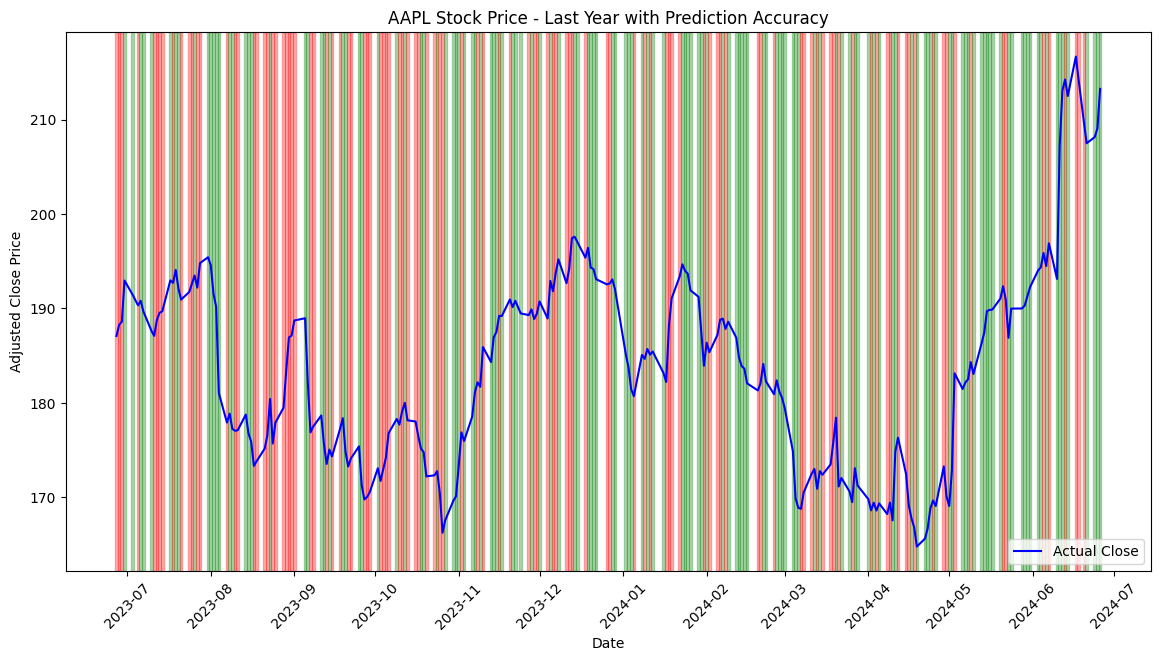

In [125]:
# Number of days to visualize (last year)
days_to_visualize = 252  # Assuming 252 trading days in a year

# Subset the last year's worth of data
subset_data = data[-days_to_visualize:].copy()
subset_dates = subset_data['date']

# Ensure we have the same features as used in training
subset_features = subset_data[['SMA_20', 'SMA_50', 'RSI_14', 'tenkan_sen', 'kijun_sen', 'senkou_span_a', 'senkou_span_b', 'chikou_span']]
subset_features = scaler.transform(subset_features)

# Reshape data for LSTM prediction
subset_features_lstm = np.reshape(subset_features, (subset_features.shape[0], 1, subset_features.shape[1]))

# Make predictions using the trained model
subset_data['predicted'] = (model_lstm.predict(subset_features_lstm) > 0.5).astype(int)

# Determine if predictions were accurate
subset_data['accurate'] = subset_data['predicted'] == subset_data['target']

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14, 7))

# Plot actual closing prices
ax.plot(subset_dates, subset_data['adjusted_close'], label='Actual Close', color='blue')

# Color code the background
for i in range(len(subset_dates)):
    color = 'green' if subset_data['accurate'].iloc[i] else 'red'
    ax.axvspan(subset_dates.iloc[i] - pd.Timedelta(days=0.5), subset_dates.iloc[i] + pd.Timedelta(days=0.5), color=color, alpha=0.3)

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close Price')
ax.set_title('AAPL Stock Price - Last Year with Prediction Accuracy')
ax.legend()

# Format the date on x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.show()


In [126]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable


In [127]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a baseline model
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluate the baseline model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_pred_dummy)

print(f'Baseline Accuracy: {accuracy_dummy}')
print(f'Baseline Precision: {precision_dummy}')
print(f'Baseline Recall: {recall_dummy}')
print(f'Baseline F1-Score: {f1_dummy}')
print(f'Baseline ROC-AUC: {roc_auc_dummy}')


Baseline Accuracy: 0.5314285714285715
Baseline Precision: 0.5314285714285715
Baseline Recall: 1.0
Baseline F1-Score: 0.6940298507462687
Baseline ROC-AUC: 0.5


In [128]:
print("Unique values in y_test:", pd.Series(y_test).unique())
print("Unique values in y_pred_lstm:", pd.Series(y_pred_lstm.flatten()).unique())


Unique values in y_test: [0 1]
Unique values in y_pred_lstm: [1 0]


In [129]:
# Convert y_test and y_pred_lstm to Pandas Series
y_test_series = pd.Series(y_test, name='Actual')
y_pred_lstm_series = pd.Series(y_pred_lstm.flatten(), name='Predicted')

# Create a contingency table
contingency_table = pd.crosstab(y_test_series, y_pred_lstm_series)
print("Contingency Table:")
print(contingency_table)


Contingency Table:
Empty DataFrame
Columns: []
Index: []


In [130]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from statsmodels.stats.contingency_tables import mcnemar
import pandas as pd
import numpy as np

# Create a baseline model
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

# Evaluate the baseline model
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy)
recall_dummy = recall_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)
roc_auc_dummy = roc_auc_score(y_test, y_pred_dummy)

print(f'Baseline Accuracy: {accuracy_dummy}')
print(f'Baseline Precision: {precision_dummy}')
print(f'Baseline Recall: {recall_dummy}')
print(f'Baseline F1-Score: {f1_dummy}')
print(f'Baseline ROC-AUC: {roc_auc_dummy}')

# Convert y_test and y_pred_lstm to Numpy arrays
y_test_np = np.array(y_test)
y_pred_lstm_np = np.array(y_pred_lstm.flatten())

# Convert to Pandas Series for crosstab
y_test_series = pd.Series(y_test_np, name='Actual')
y_pred_lstm_series = pd.Series(y_pred_lstm_np, name='Predicted')

# Check unique values
print("Unique values in y_test:", y_test_series.unique())
print("Unique values in y_pred_lstm:", y_pred_lstm_series.unique())

# Print a larger sample of actual and predicted values
sample_size = 50
print("Sample of y_test:")
print(y_test_np[:sample_size])
print("Sample of y_pred_lstm:")
print(y_pred_lstm_np[:sample_size])

# Print the indices and values of y_test and y_pred_lstm
for i in range(sample_size):
    print(f"Index {i} - Actual: {y_test_np[i]}, Predicted: {y_pred_lstm_np[i]}")

# Create a detailed contingency table
contingency_table = pd.crosstab(y_test_series, y_pred_lstm_series, rownames=['Actual'], colnames=['Predicted'])
print("Detailed Contingency Table:")
print(contingency_table)

# Perform McNemar's test if the table is not empty
if not contingency_table.empty:
    result = mcnemar(contingency_table, exact=True)
    print(f'McNemar Test Statistic: {result.statistic}')
    print(f'McNemar Test p-value: {result.pvalue}')
else:
    print("Contingency table is empty. Cannot perform McNemar's test.")


Baseline Accuracy: 0.5314285714285715
Baseline Precision: 0.5314285714285715
Baseline Recall: 1.0
Baseline F1-Score: 0.6940298507462687
Baseline ROC-AUC: 0.5
Unique values in y_test: [0 1]
Unique values in y_pred_lstm: [1 0]
Sample of y_test:
[0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1
 0 1 1 1 0 0 0 1 1 1 0 1 1]
Sample of y_pred_lstm:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Index 0 - Actual: 0, Predicted: 1
Index 1 - Actual: 1, Predicted: 1
Index 2 - Actual: 1, Predicted: 1
Index 3 - Actual: 1, Predicted: 1
Index 4 - Actual: 1, Predicted: 1
Index 5 - Actual: 0, Predicted: 1
Index 6 - Actual: 0, Predicted: 1
Index 7 - Actual: 1, Predicted: 1
Index 8 - Actual: 0, Predicted: 1
Index 9 - Actual: 1, Predicted: 1
Index 10 - Actual: 1, Predicted: 1
Index 11 - Actual: 0, Predicted: 1
Index 12 - Actual: 0, Predicted: 1
Index 13 - Actual: 1, Predicted: 1
Index 14 - Actual: 1, Predicted: 1
Index 15 - Ac